# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date

%matplotlib inline

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [65]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    nc = citipy.nearest_city(*lat_lng)
    city = nc.city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)        

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [66]:
df = pd.DataFrame(columns=["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])

base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {'appid': api_key,
         'q': cities[0],
         'units': 'imperial'}
set_no = 1

print("Beginning Data Retrieval")
print("-"*36)
begin_time = time.time()
for i, c in enumerate(cities):
    params['q'] = c
    data = requests.get(url=base_url, params=params).json()
    print(f"Processing Record {i%50} of Set {set_no} | {c}")
    try:
        city = data['name']
        cloudiness = data['clouds']['all']
        country = data['sys']['country']
        city_date = data['dt']
        humidity = data['main']['humidity']
        lat = data['coord']['lat']
        lng = data['coord']['lon']
        max_temp = data['main']['temp_max']
        wind_speed = data['wind']['speed']
        df.loc[i] = [city, cloudiness, country, city_date, humidity, lat, lng, max_temp, wind_speed]
    except KeyError:
        print("City not found. Skipping...")
    
    # Free API calls are capped at 60 calls per minute, so we play it safe
    # Call in sets of 50, setting timer at the beginning and waiting
    # For it to hit a minute before we continue on to the next set
    if i % 50 == 49:
        set_no += 1
        time.sleep(max([60 - (time.time() - begin_time), 0]))
        begin_time = time.time()

print("Data Retrieval Complete.")

Beginning Data Retrieval
------------------------------------
Processing Record 0 of Set 1 | tasiilaq
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | lubango
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | bijar
Processing Record 6 of Set 1 | port blair
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | norman wells
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | galgani
City not found. Skipping...
Processing Record 16 of Set 1 | saint george
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | nuuk
Processing Record 21 of Set 1 | bengkulu
City no

Processing Record 34 of Set 4 | saskylakh
Processing Record 35 of Set 4 | eureka
Processing Record 36 of Set 4 | gaya
Processing Record 37 of Set 4 | isparta
Processing Record 38 of Set 4 | nemuro
Processing Record 39 of Set 4 | labuan
Processing Record 40 of Set 4 | oranjemund
Processing Record 41 of Set 4 | ponta delgada
Processing Record 42 of Set 4 | griffith
Processing Record 43 of Set 4 | kahului
Processing Record 44 of Set 4 | one hundred mile house
City not found. Skipping...
Processing Record 45 of Set 4 | sorong
Processing Record 46 of Set 4 | belaya gora
Processing Record 47 of Set 4 | grindavik
Processing Record 48 of Set 4 | thompson
Processing Record 49 of Set 4 | tiarei
Processing Record 0 of Set 5 | myanaung
Processing Record 1 of Set 5 | tuktoyaktuk
Processing Record 2 of Set 5 | barcelos
Processing Record 3 of Set 5 | upernavik
Processing Record 4 of Set 5 | gat
Processing Record 5 of Set 5 | kingaroy
Processing Record 6 of Set 5 | banting
Processing Record 7 of Set 5

Processing Record 21 of Set 8 | nandgaon
Processing Record 22 of Set 8 | alofi
Processing Record 23 of Set 8 | bungu
Processing Record 24 of Set 8 | san policarpo
Processing Record 25 of Set 8 | aklavik
Processing Record 26 of Set 8 | ekibastuz
Processing Record 27 of Set 8 | inuvik
Processing Record 28 of Set 8 | mehran
Processing Record 29 of Set 8 | sayyan
Processing Record 30 of Set 8 | babanusah
City not found. Skipping...
Processing Record 31 of Set 8 | tuxpan
Processing Record 32 of Set 8 | chicama
Processing Record 33 of Set 8 | comodoro rivadavia
Processing Record 34 of Set 8 | bacungan
Processing Record 35 of Set 8 | akhmim
Processing Record 36 of Set 8 | pershotravneve
Processing Record 37 of Set 8 | bankfoot
Processing Record 38 of Set 8 | aleksandrovskoye
Processing Record 39 of Set 8 | saint-pierre
Processing Record 40 of Set 8 | trelew
Processing Record 41 of Set 8 | santa maria del oro
Processing Record 42 of Set 8 | kimbe
Processing Record 43 of Set 8 | ledyard
Process

Processing Record 7 of Set 12 | puquio
Processing Record 8 of Set 12 | juneau
Processing Record 9 of Set 12 | killarney
Processing Record 10 of Set 12 | leo
Processing Record 11 of Set 12 | lianzhou
Processing Record 12 of Set 12 | kholtoson
Processing Record 13 of Set 12 | mafeteng
Processing Record 14 of Set 12 | nelson bay
Processing Record 15 of Set 12 | rawlins
Processing Record 16 of Set 12 | kolpashevo
Processing Record 17 of Set 12 | aksu
Processing Record 18 of Set 12 | yerbogachen
Processing Record 19 of Set 12 | asau
City not found. Skipping...
Processing Record 20 of Set 12 | mahdalynivka
Processing Record 21 of Set 12 | barranca
Processing Record 22 of Set 12 | port augusta
Processing Record 23 of Set 12 | asyut
Processing Record 24 of Set 12 | moose factory
Processing Record 25 of Set 12 | santa maria
Processing Record 26 of Set 12 | semirom
Processing Record 27 of Set 12 | makakilo city
Processing Record 28 of Set 12 | eydhafushi
Processing Record 29 of Set 12 | kulhudhu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [69]:
df.to_csv(output_data_file)

df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tasiilaq,44,GL,1551676374,94,65.61,-37.64,15.95,11.63
1,Avarua,68,CK,1551675600,78,-21.21,-159.78,78.80,8.05
2,Ushuaia,20,AR,1551675600,70,-54.81,-68.31,44.60,5.82
3,Lubango,20,AO,1551676560,86,-14.92,13.49,62.21,1.90
4,Mount Gambier,0,AU,1551672000,34,-37.83,140.78,78.80,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

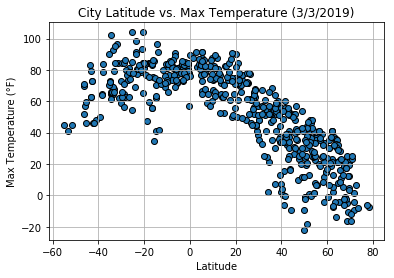

In [89]:
the_date = date.fromtimestamp(df['Date'].min())

date_string = '{0:d}/{1:d}/{2:d}'.format(the_date.month, the_date.day, the_date.year)

plt.scatter(df['Lat'], df['Max Temp'], edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("City Latitude vs. Max Temperature (" + date_string + ")")

lat_vs_temp_fig = plt.gcf()
lat_vs_temp_fig.savefig('output_data/lat_vs_temp.png')
lat_vs_temp_fig.show()

#### Latitude vs. Humidity Plot

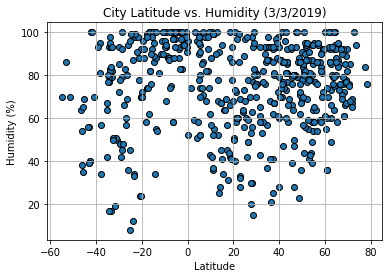

In [90]:
plt.scatter(df['Lat'], df['Humidity'], edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (" + date_string + ")")

lat_vs_humidity_fig = plt.gcf()
lat_vs_humidity_fig.savefig('output_data/lat_vs_humidity.png')
lat_vs_humidity_fig.show()

#### Latitude vs. Cloudiness Plot

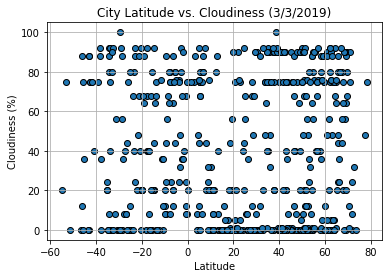

In [91]:
plt.scatter(df['Lat'], df['Cloudiness'], edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (" + date_string + ")")

lat_vs_cloudiness_fig = plt.gcf()
lat_vs_cloudiness_fig.savefig('output_data/lat_vs_cloudiness.png')
lat_vs_cloudiness_fig.show()

#### Latitude vs. Wind Speed Plot

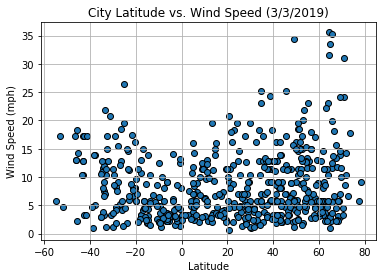

In [92]:
plt.scatter(df['Lat'], df['Wind Speed'], edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (" + date_string + ")")

lat_vs_windspeed_fig = plt.gcf()
lat_vs_windspeed_fig.savefig('output_data/lat_vs_windspeed.png')
lat_vs_windspeed_fig.show()